###  Description
    Acceleration (x,y,z) - Accelerometers embedded in smartphones or smartwatches now days are used to detect the orientation of the phone or watch
    Gyroscope (x,y,z) - Gyroscopeis tracks the rotation or twist  which adds an additional dimension to the information provided by the accelerometer, the gryo on the other hand measures the rotational angular velocity.
    The information provided but these sensors supplements each other in the process of motion sensing.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv(r"C:\Users\subra\Downloads\PRCP-1013-WalkRunClass\Data\walkrun.csv")
df.head()

,date,time,username,wrist,activity,acceleration_x,acceleration_y,acceleration_z,gyro_x,gyro_y,gyro_z
0,2017-6-30,13:51:15:847724020,viktor,0,0,0.2650,-0.7814,-0.0076,-0.0590,0.0325,-2.9296
1,2017-6-30,13:51:16:246945023,viktor,0,0,0.6722,-1.1233,-0.2344,-0.1757,0.0208,0.1269
2,2017-6-30,13:51:16:446233987,viktor,0,0,0.4399,-1.4817,0.0722,-0.9105,0.1063,-2.4367
3,2017-6-30,13:51:16:646117985,viktor,0,0,0.3031,-0.8125,0.0888,0.1199,-0.4099,-2.9336
4,2017-6-30,13:51:16:846738994,viktor,0,0,0.4814,-0.9312,0.0359,0.0527,0.4379,2.4922


In [3]:
df.shape

(88588, 11)

### Basic Checks and Domain Analysis

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88588 entries, 0 to 88587
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   date            88588 non-null  object 
 1   time            88588 non-null  object 
 2   username        88588 non-null  object 
 3   wrist           88588 non-null  int64  
 4   activity        88588 non-null  int64  
 5   acceleration_x  88588 non-null  float64
 6   acceleration_y  88588 non-null  float64
 7   acceleration_z  88588 non-null  float64
 8   gyro_x          88588 non-null  float64
 9   gyro_y          88588 non-null  float64
 10  gyro_z          88588 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 7.4+ MB


In [5]:
df.describe()

,wrist,activity,acceleration_x,acceleration_y,acceleration_z,gyro_x,gyro_y,gyro_z
count,88588.000000,88588.000000,88588.000000,88588.000000,88588.000000,88588.000000,88588.000000,88588.000000
mean,0.522170,0.500801,-0.074811,-0.562585,-0.313956,0.004160,0.037203,0.022327
std,0.499511,0.500002,1.009299,0.658458,0.486815,1.253423,1.198725,1.914423
min,0.000000,0.000000,-5.350500,-3.299000,-3.753800,-4.430600,-7.464700,-9.480000
25%,0.000000,0.000000,-0.381800,-1.033500,-0.376000,-0.920700,-0.644825,-1.345125
50%,1.000000,1.000000,-0.059500,-0.759100,-0.221000,0.018700,0.039300,0.006900
75%,1.000000,1.000000,0.355500,-0.241775,-0.085900,0.888800,0.733700,1.398200
max,1.000000,1.000000,5.603300,2.668000,1.640300,4.874200,8.498000,11.266200


In [6]:
df.describe(include=["O"])

,date,time,username
count,88588,88588,88588
unique,12,88588,1
top,2017-7-16,13:51:15:847724020,viktor
freq,20480,1,88588


In [7]:
df['activity'].value_counts()

1    44365
0    44223
Name: activity, dtype: int64

### EDA

#### Univariate Analysis

<AxesSubplot:xlabel='activity', ylabel='count'>

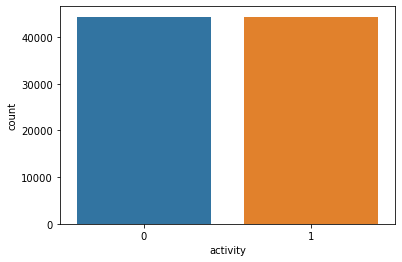

In [8]:
sns.countplot(df['activity'])

    1. The count of target variable are allmost equally divided.
    2. Here the activity column 0 values are walking.
    3. Here the activity column 1 values are running.

<AxesSubplot:xlabel='wrist', ylabel='count'>

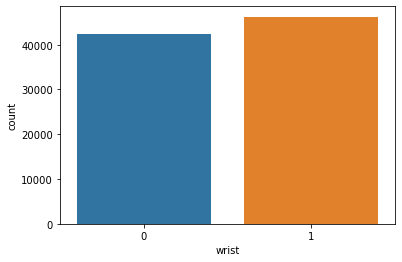

In [9]:
sns.countplot(df['wrist'])

    1. The count of independent variable are not equally divided.
    2. Here the wrist column 0 values are left.
    3. Here the wrist column 1 values are right.

<AxesSubplot:xlabel='acceleration_x', ylabel='Density'>

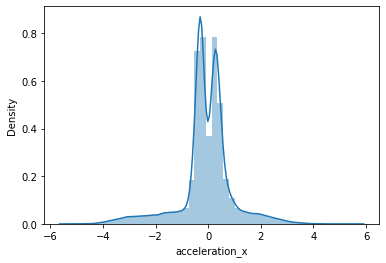

In [10]:
sns.distplot(df['acceleration_x'])

    1. Here is distribution is not normal.
    2. The maximum data distribution is lies between -0.3 - -0.4
    3. The minimum data distribution is lies between -3.5 - -4

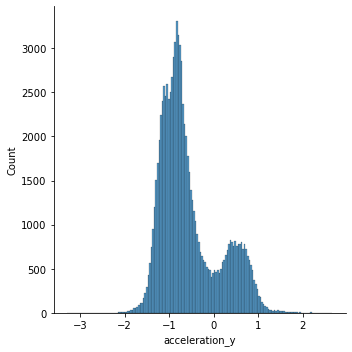

In [11]:
sns.displot(df['acceleration_y'])

    1. Here the distribution is not normal.
    2. The maximum data distribution is lies between -0.3 - -0.4
    3. The minimum data distribution is lies between -1.5 - -2

<AxesSubplot:xlabel='acceleration_z', ylabel='Density'>

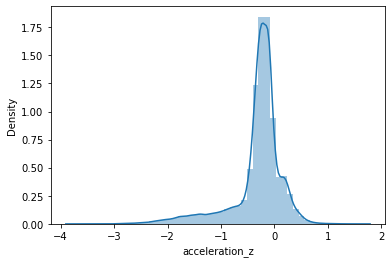

In [12]:
sns.distplot(df['acceleration_z'])

    1. Here the distribution is not normal.
    2. The maximum data distribution is lies between -0.3 - -0.7
    3. The minimum data distribution is lies between -3.5 - -4

<AxesSubplot:xlabel='gyro_x', ylabel='Density'>

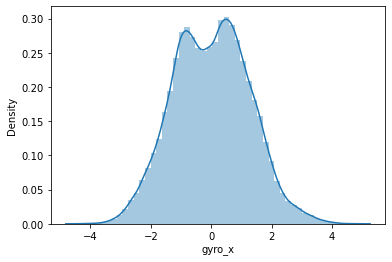

In [13]:
sns.distplot(df['gyro_x'])

    1. Here the distribution is not normal.
    2. The maximum data distribution is lies between 1 - 1.7
    3. The minimum data distribution is lies between -3.5 - -4.2

<AxesSubplot:xlabel='gyro_y', ylabel='Density'>

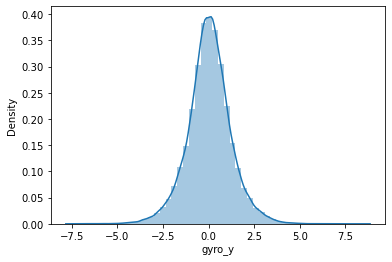

In [14]:
sns.distplot(df['gyro_y'])

    1. Here the distribution is little normal.
    2. The maximum data distribution is lies between 0 - 0.5
    3. The minimum data distribution is lies between -5.5 - -7.5

<AxesSubplot:xlabel='gyro_z', ylabel='Density'>

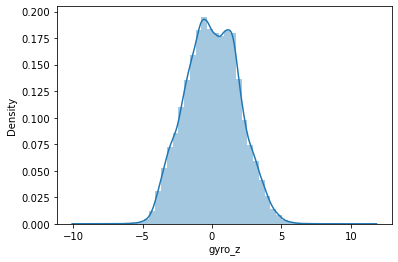

In [15]:
sns.distplot(df['gyro_z'])

    1. Here the distribution is not normal.
    2. The maximum data distribution is lies between -0.8 - -1.9

#### Mutlivarivate Anaylsis

<AxesSubplot:xlabel='wrist', ylabel='count'>

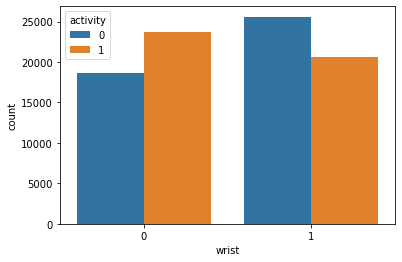

In [16]:
sns.countplot(x=df.wrist,hue=df.activity)

### Bivariate Anaylsis

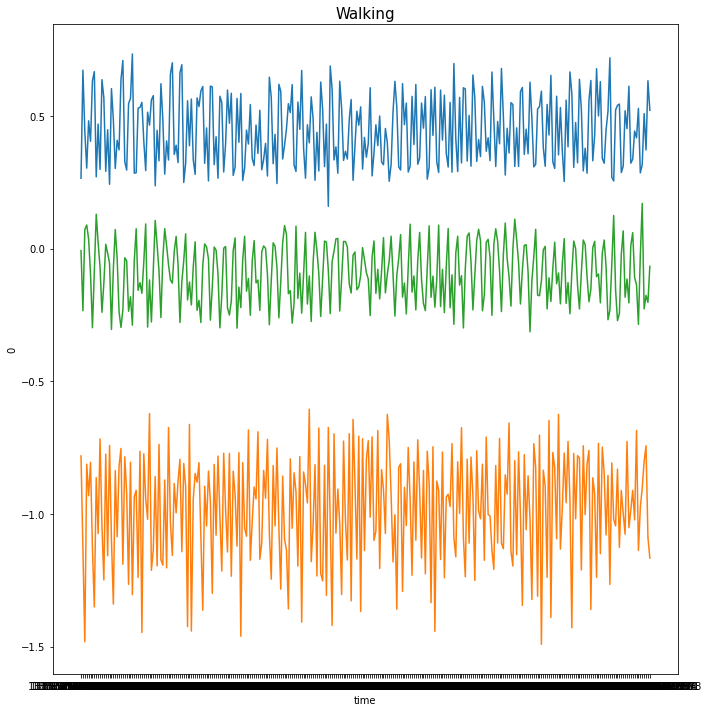

In [24]:
plt.figure(figsize=(10,10))
activities = [0]
for i in activities:
    data = df[(df['username'] == 'viktor') & (df['activity'] == i)][:300]
    sns.lineplot(y = 'acceleration_x', x = 'time', data = data)
    sns.lineplot(y = 'acceleration_y', x = 'time', data = data)
    sns.lineplot(y = 'acceleration_z', x = 'time', data = data)
    plt.ylabel(i)
    plt.title('Walking', fontsize = 15)
    plt.tight_layout()

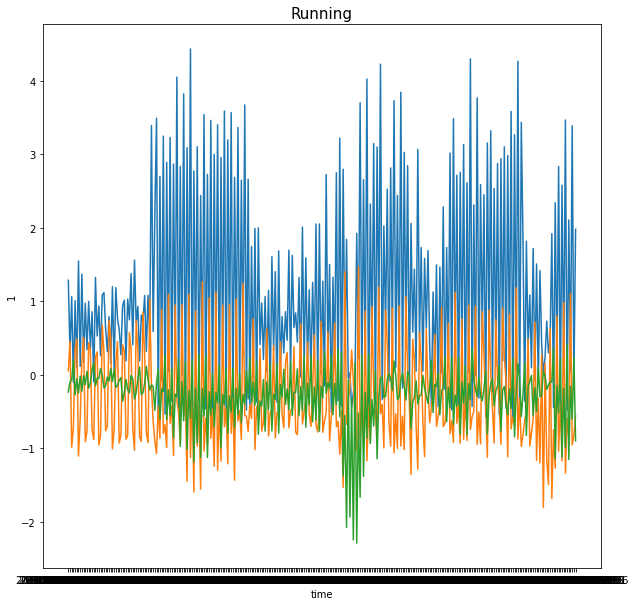

In [23]:
plt.figure(figsize=(10,10))
activities = [1]
for i in activities:
    data = df[(df['username'] == 'viktor') & (df['activity'] == i)][:300]
    sns.lineplot(y = 'acceleration_x', x = 'time', data = data)
    sns.lineplot(y = 'acceleration_y', x = 'time', data = data)
    sns.lineplot(y = 'acceleration_z', x = 'time', data = data)
    plt.ylabel(i)
    plt.title('Running', fontsize = 15)
    plt.show()

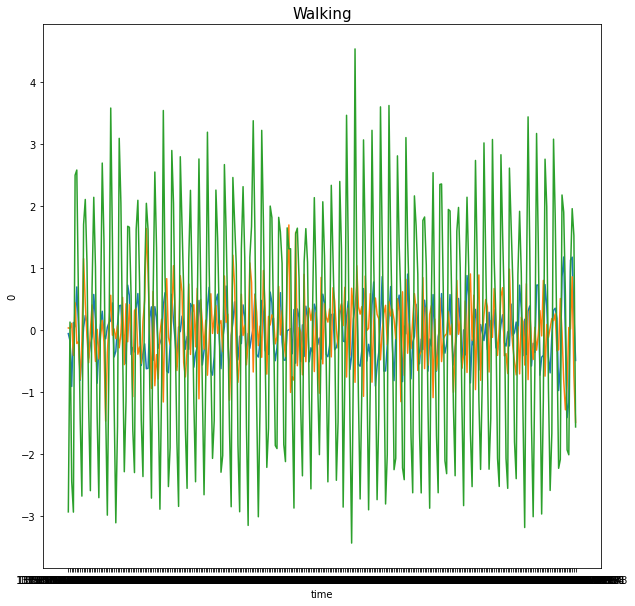

In [20]:
plt.figure(figsize=(10,10))
activities = [0]

for i in activities:
    data = df[(df['username'] == 'viktor') & (df['activity'] == i)][:300]
    sns.lineplot(y = 'gyro_x', x = 'time', data = data)
    sns.lineplot(y = 'gyro_y', x = 'time', data = data)
    sns.lineplot(y = 'gyro_z', x = 'time', data = data)
    plt.ylabel(i)
    plt.title('Walking', fontsize = 15)
    plt.show()

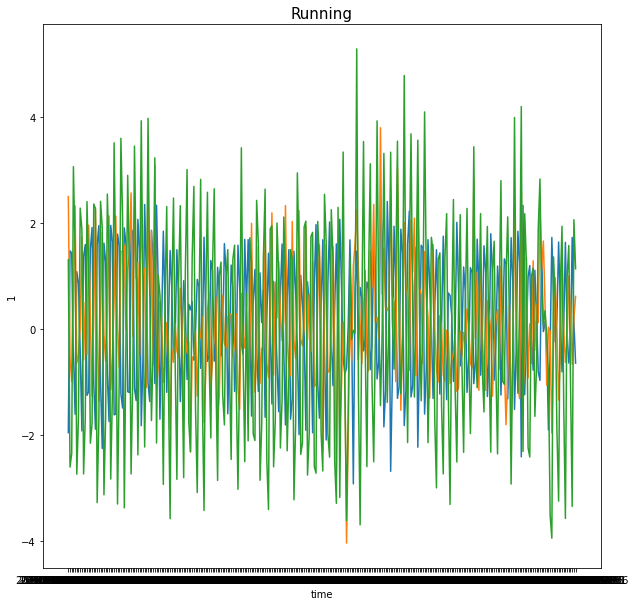

In [22]:
plt.figure(figsize=(10,10))
activities = [1]
for i in activities:
    data = df[(df['username'] == 'viktor') & (df['activity'] == i)][:300]
    sns.lineplot(y = 'gyro_x', x = 'time', data = data)
    sns.lineplot(y = 'gyro_y', x = 'time', data = data)
    sns.lineplot(y = 'gyro_z', x = 'time', data = data)
    plt.ylabel(i)
    plt.title('Running', fontsize = 15)
    plt.show()

### Data Processing

In [ ]:
df.isnull().sum()

date              0
time              0
username          0
wrist             0
activity          0
acceleration_x    0
acceleration_y    0
acceleration_z    0
gyro_x            0
gyro_y            0
gyro_z            0
dtype: int64

In [ ]:
df.drop(columns=['username','time','date'],axis=1,inplace=True)

In [ ]:
df.head()

,wrist,activity,acceleration_x,acceleration_y,acceleration_z,gyro_x,gyro_y,gyro_z
0,0,0,0.2650,-0.7814,-0.0076,-0.0590,0.0325,-2.9296
1,0,0,0.6722,-1.1233,-0.2344,-0.1757,0.0208,0.1269
2,0,0,0.4399,-1.4817,0.0722,-0.9105,0.1063,-2.4367
3,0,0,0.3031,-0.8125,0.0888,0.1199,-0.4099,-2.9336
4,0,0,0.4814,-0.9312,0.0359,0.0527,0.4379,2.4922


In [ ]:
X=df[['wrist','acceleration_x','acceleration_y','acceleration_z','gyro_x','gyro_y','gyro_z']]
y=df['activity']

### labels from sequences

In [ ]:
random_seed = 42        # the seed value is used to generate the random number row selected
n_time_steps =  50      # it timestamp or time gap of moment as per graph
n_features = 7          # number of feature in data
step = 10               # here the LSTM model is learning from the each data
n_epochs = 50           # it one complete cycle of propagation in neural networks
batch_size = 1000       # in 1 epoch how many row of data will defined by batch_size
learning_rate = 0.002  # learning rate is a value given for gradient descent to reach gobal minima

In [ ]:
# Here i am process data or n_rows from data into n_number frames or time-series so that model can take as input data
segments = []
labels = []

from scipy import stats

for i in range(0,  df.shape[0]- n_time_steps, step):  

    xs = df['acceleration_x'].values[i: i + n_time_steps]

    ys = df['acceleration_y'].values[i: i + n_time_steps]

    zs = df['acceleration_z'].values[i: i + n_time_steps]
    
    xg = df['gyro_x'].values[i: i +n_time_steps]
    
    yg = df['gyro_x'].values[i: i +n_time_steps]

    zg = df['gyro_z'].values[i: i + n_time_steps]
    
    w = df['wrist'].values[i: i + n_time_steps]

    label = stats.mode(df['activity'][i: i + n_time_steps])[0][0]

    segments.append([xs, ys, zs, xg, yg, zg, w])

    labels.append(label)

reshaped_segments = np.asarray(segments, dtype= np.float32).reshape(-1, n_time_steps, n_features)

labels = np.asarray(pd.get_dummies(labels), dtype = np.float32)

In [ ]:
labels.shape

(8854, 2)

In [ ]:
reshaped_segments.shape

(8854, 50, 7)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(reshaped_segments, labels, test_size = 0.2, random_state = random_seed)

### Train the  CNN-LSTM Model

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from keras.layers import LSTM, Dense, Flatten, Dropout

In [ ]:
model = Sequential()
# RNN layer
model.add(LSTM(units = 128, input_shape = (X_train.shape[1], X_train.shape[2])))
# Dropout layer
model.add(Dropout(0.5)) 
# Dense layer with activition functions
model.add(Dense(units = 64, activation='relu'))
model.add(Dense(y_train.shape[1], activation = 'sigmoid'))
# Compile model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_3 (LSTM)               (None, 128)               69632     
                                                                 
 dropout_3 (Dropout)         (None, 128)               0         
                                                                 
 dense_6 (Dense)             (None, 64)                8256      
                                                                 
 dense_7 (Dense)             (None, 2)                 130       
                                                                 
Total params: 78,018
Trainable params: 78,018
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.layers

### Model Training and Evaluation

In [ ]:
history = model.fit(X_train, y_train, epochs = n_epochs, validation_split = 0.20, batch_size = batch_size, verbose = 1)

Epoch 1/50
6/6 [==============================] - 7s 285ms/step - loss: 0.6732 - accuracy: 0.5699 - val_loss: 0.6341 - val_accuracy: 0.5829
Epoch 2/50
6/6 [==============================] - 0s 49ms/step - loss: 0.5281 - accuracy: 0.7508 - val_loss: 0.2508 - val_accuracy: 0.9612
Epoch 3/50
6/6 [==============================] - 0s 44ms/step - loss: 0.1664 - accuracy: 0.9635 - val_loss: 0.0702 - val_accuracy: 0.9887
Epoch 4/50
6/6 [==============================] - 0s 44ms/step - loss: 0.0537 - accuracy: 0.9938 - val_loss: 0.0451 - val_accuracy: 0.9936
Epoch 5/50
6/6 [==============================] - 0s 44ms/step - loss: 0.0251 - accuracy: 0.9952 - val_loss: 0.0459 - val_accuracy: 0.9894
Epoch 6/50
6/6 [==============================] - 0s 43ms/step - loss: 0.0254 - accuracy: 0.9931 - val_loss: 0.0473 - val_accuracy: 0.9929
Epoch 7/50
6/6 [==============================] - 0s 44ms/step - loss: 0.0285 - accuracy: 0.9947 - val_loss: 0.0311 - val_accuracy: 0.9929
Epoch 8/50
6/6 [==========

In [ ]:
loss, accuracy = model.evaluate(X_test, y_test, batch_size = batch_size, verbose = 1)
print("Test Accuracy :", accuracy)
print("Test Loss :", loss)

2/2 [==============================] - 0s 34ms/step - loss: 0.0069 - accuracy: 0.9977
Test Accuracy : 0.9977414011955261
Test Loss : 0.006933239754289389


### Plotting Accuracy Metrics

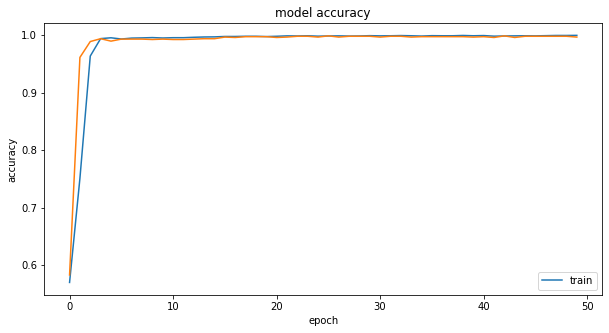

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')

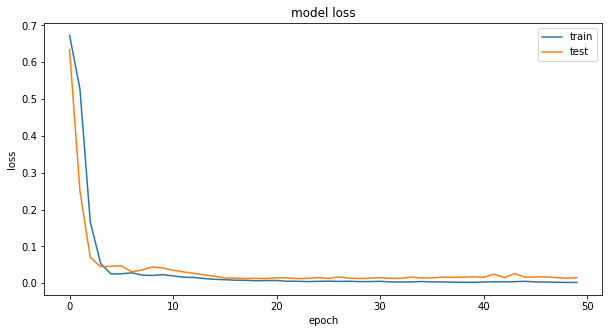

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')

### Confusion matrix

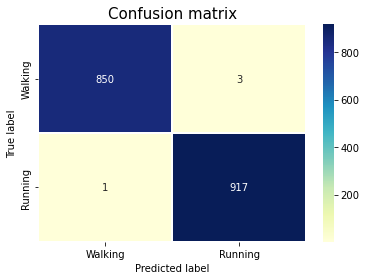

In [ ]:
from sklearn.metrics import confusion_matrix
predictions = model.predict(X_test)
class_labels = ['Walking','Running']
max_test = np.argmax(y_test, axis=1)
max_predictions = np.argmax(predictions, axis=1)
confusion_matrix = confusion_matrix(max_test, max_predictions)
sns.heatmap(confusion_matrix, xticklabels = class_labels, yticklabels = class_labels, annot = True, linewidths = 0.1, fmt='d', cmap = 'YlGnBu')
plt.title("Confusion matrix", fontsize = 15)
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

### Conclusion

        We started with the raw accelerometer signal data consisting of  just 7 relevant features – reading of accelerometer along x, y, and z axes of both acceleration, gyro and the timestamp at which the readings were taken. 
        We trained a simple LSTM network on the frames or time-series data. LSTM model learns complex features automatically from the sequential data to be able to predict the class label with high accuracy.